## Exercise 5

### a) Exploration of the dataset

In [1]:
# a) Exploration of the dataset
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# reading csv files
df = pd.read_csv(Path(r'../dataset/Hdma.csv'))
display(df.head(3))
display(df.info())
display(df.describe())

,"dir;""hir"";""lvr"";""ccs"";""mcs"";""pbcr"";""dmi"";""self"";""single"";""uria"";""condo"";""black"";""deny"""
0,"0.221000003814697;0.221000003814697;0.8;5;2;""n..."
1,"0.265;0.265;0.921875;2;2;""no"";""no"";""no"";""yes"";..."
2,0.372000007629395;0.247999992370605;0.92039800...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 1 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   dir;"hir";"lvr";"ccs";"mcs";"pbcr";"dmi";"self";"single";"uria";"condo";"black";"deny"  2381 non-null   object
dtypes: object(1)
memory usage: 18.7+ KB


None

,"dir;""hir"";""lvr"";""ccs"";""mcs"";""pbcr"";""dmi"";""self"";""single"";""uria"";""condo"";""black"";""deny"""
count,2381
unique,2378
top,"0.36;0.3;0.591054313099042;1;1;""no"";""no"";""no"";..."
freq,2


### b) Influencing factors
Influencing factors for mortgage denial can be analyzed using:
> classification models and their feature importance e.g. Logistic Regression, Decision Tree

### c) Preprocessing of the data
> Preprocessing of the data is required, since we observed in a)
all information is stored in one column

In [2]:
# c) Preprocessing of data
data = []
for k in range(len(df.values)):
    row = df.values[k][0].replace("\"", "").split(";")
    for i in range(len(row)):
        if row[i][0].isdigit():
            if '.' in row[i]:
                row[i] = float(row[i])
            else:
                row[i] = int(row[i])
    data.append(row)

# Proper dividing into columns
columns = df.columns.tolist()[0].split(";\"")
for i in range(len(columns)):
    if columns[i][-1] == "\"":
        columns[i] = columns[i][:-1]
df = pd.DataFrame(data, columns=columns)
display(df.head(3))
display(df.info())

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dir     2381 non-null   float64
 1   hir     2381 non-null   float64
 2   lvr     2381 non-null   float64
 3   ccs     2381 non-null   float64
 4   mcs     2381 non-null   float64
 5   pbcr    2381 non-null   object 
 6   dmi     2381 non-null   object 
 7   self    2381 non-null   object 
 8   single  2381 non-null   object 
 9   uria    2381 non-null   float64
 10  condo   2381 non-null   int64  
 11  black   2381 non-null   object 
 12  deny    2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


None

In [3]:
# replace categorical attributes with numerical
cat_cols = df.select_dtypes("object").columns
for col in cat_cols:
    df[col] = pd.get_dummies(df[col])
df.describe()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,0.000420,0.979840,0.000420,0.606468,3.774496,0.288114,0.857623,0.880302
std,0.107235,0.096635,0.178715,1.666370,0.537169,0.020494,0.140576,0.020494,0.488636,2.026636,0.452980,0.349510,0.324676
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.100000,0.000000,1.000000,1.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.200000,0.000000,1.000000,1.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3.900000,1.000000,1.000000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


### d) Logistic Regression

In [4]:
# Separate training and test data
X = df.drop(['deny'], axis=1)
y = df[['deny']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#%%

In [5]:
# train the model
from sklearn.linear_model import LogisticRegression
logRegr = LogisticRegression()
logRegr.fit(X_train, y_train.values.ravel())

LogisticRegression()

Coefficient and significance level indicate feature imprtance

The sign (positive or negative) of the coefficient indicates class (1 or 0)

Coefficients:
[[-2.63598573 -0.98243406 -1.35528527 -0.34768403 -0.14045714  0.
   3.42849959  0.          0.37239132 -0.07934605 -0.00469644  0.83031377]]


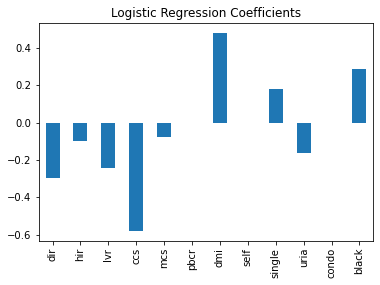

In [6]:
# Estimated coefficients
print("Coefficients:")
print(logRegr.coef_)
# significance levels with std times model coefficient gives us feature importance
feature_importance = np.std(X_train, axis=0)*logRegr.coef_[0]
feature_importance.plot.bar(title="Logistic Regression Coefficients")
plt.show()

LogisticRegression: AUC of ROC = 0.84


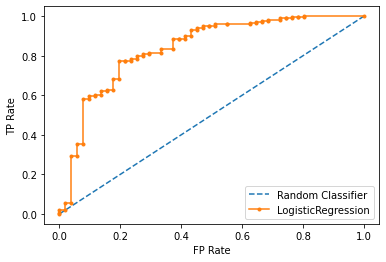

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def calc_auc_roc(model):
    """
    Calculates the Area Under ROC and plots ROC
    :param model: input model
    """
    model_name = type(model).__name__
    if model_name == 'LinearSVC':
        lr_probs = model._predict_proba_lr(X_test)
    else:
        lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('%s: AUC of ROC = %.2f' % (model_name, lr_auc))
    # calculate roc curves
    ns_probs = [0 for _ in range(len(y_test))] # random line
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classifier')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

calc_auc_roc(logRegr)

### e) Class weights
> Class weight is a hyperparameters for labels
by calculation of the neg-log-likelihood when fitting the model.
> Automatic solving of class imbalance problem is done by setting to 'balanced', i.e. class weights given by<br>
 $n_{samples} / (n_{classes} * np.bincount(y))$ <br>

> In our case, the distribution of the labels is imbalanced (the histogram below). Therefore, the use of this is beneficial here.

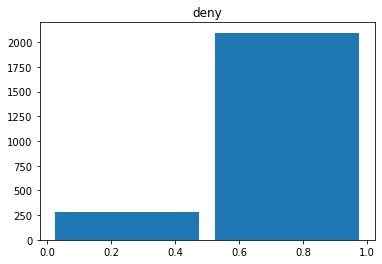

In [8]:
ax = df.hist(column='deny', bins=2, grid=False, rwidth=0.9)

### f) Classification using different models

In [9]:
# train different models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC

seed = 0
models = [DummyClassifier(strategy="most_frequent"),
            DecisionTreeClassifier(random_state=seed),
            RandomForestClassifier(random_state=seed),
            AdaBoostClassifier(random_state=seed),
            ComplementNB(),
            LinearSVC(random_state=seed)]
for i in range(len(models)):
    models[i] = models[i].fit(X_train, y_train.values.ravel())

/home/dmitrii/anaconda3/envs/work/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Comparison of feature importance for Decision Tree, Random Forest and Ada Boost

> Feature importance (Gini or MDI): sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits

> Feature importance and other methods (coefficients, feature log probabilities) cannot be compared directly, but can be compared relatively (e.g. rang of features)

None

None

None

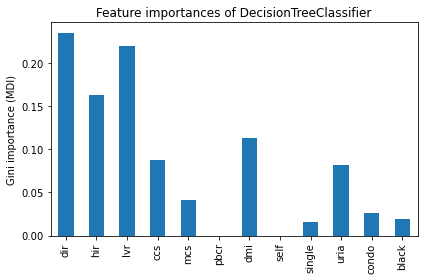

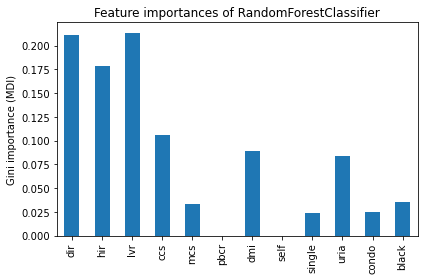

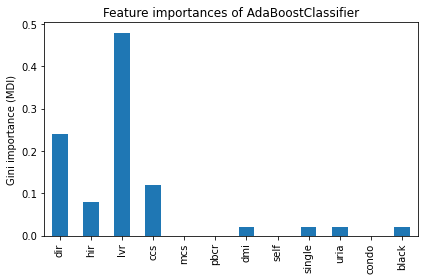

In [10]:
def calc_feature_importance(model, feature_names):
    """
    Caclulates feature importances and visualize with bar chart
    :param model: input name
    :param feature_names: names of features for training
    """
    feature_importances = model.feature_importances_
    model_importances = pd.Series(feature_importances, index=feature_names)
    fig, ax = plt.subplots()
    model_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances of %s" % type(model).__name__)
    ax.set_ylabel("Gini importance (MDI)")
    display(fig.tight_layout())

feature_names = X.columns.values
for i in [1,2,3]:
    calc_feature_importance(models[i], feature_names)

Observations:
1. Both Logistic regression and any model above show that 'pbcr', 'self' and 'condo' are *not* important for prediction, i.e.
    1. public bad credit record?
    2. self employed?
    2. is unit a condominium?
2. All models show the importance of features 'dir', 'hir', 'lvr', 'ccs', namely
    1. debt payments to total income ratio
    2. housing expenses to income ratio
    3. ratio of size of loan to assessed value of property
    4. consumer credit score from 1 to 6 (a low value being a good score)
3. Tree models and Logistic Regression show also 'dmi' and 'uria' as important:
    1. denied mortgage insurance ?
    2. 1989 Massachusetts unemployment rate in the applicant’s industry
4. Ada Boost does not show other features as significantly important

AUC of ROC for all models (for test dataset)

DummyClassifier: AUC of ROC = 0.50
DecisionTreeClassifier: AUC of ROC = 0.64
RandomForestClassifier: AUC of ROC = 0.84
AdaBoostClassifier: AUC of ROC = 0.82
ComplementNB: AUC of ROC = 0.73
LinearSVC: AUC of ROC = 0.84


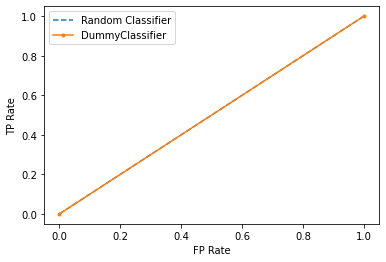

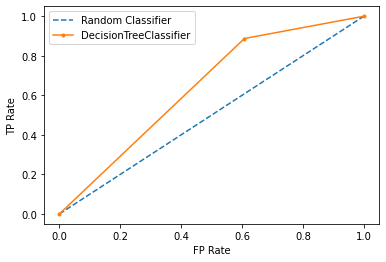

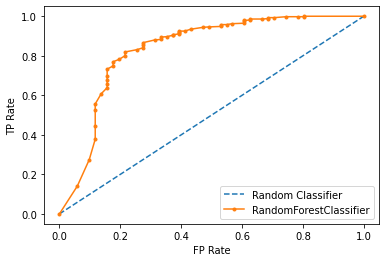

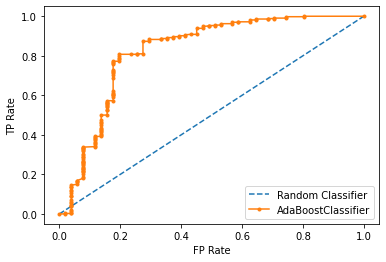

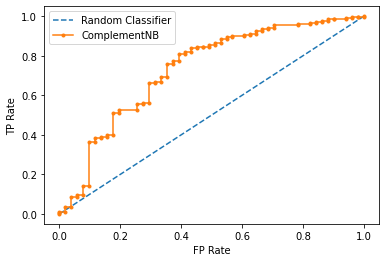

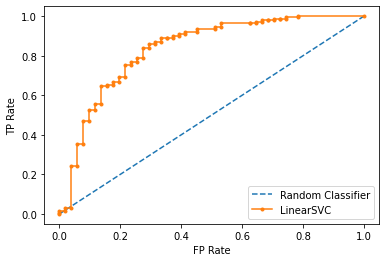

In [11]:
for i in range(len(models)):
    calc_auc_roc(models[i])

Observations:
1. DummyClassifier as expected is not better than Random one
2. Other classifiers work better than expected curve
3. SVM and Random Forest as Logistic Regresion achieve the maximum AUC = 0.84